# Analyse Exploratoire du fichier myreport_sql_gestionairedememoire_full.csv

### Imports (fichier & modules)

In [250]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
#import os
#print(os.getcwd())
#print(os.listdir('241016_LogETL'))

In [251]:
tab = pd.read_csv('../../data/logServer/myreport_sql_gestionairedememoire_full.csv', sep=',')

### Le fichier myreport_sql_gestionairedememoire_full.csv : taille, colonnes

In [253]:
print("il y a ",tab.shape[0]," lignes et ",tab.shape[1]," colonnes dans le data frame")

il y a  2882  lignes et  16  colonnes dans le data frame


In [254]:
tab.columns

Index(['Date et heure', 'Date et heure(RAW)', 'Mémoire de connexion',
       'Mémoire de connexion(RAW)', 'Mémoire de l'optimiseur',
       'Mémoire de l'optimiseur(RAW)', 'Mémoire totale du serveur',
       'Mémoire totale du serveur(RAW)', 'Mémoire du serveur cible',
       'Mémoire du serveur cible(RAW)', 'Mémoire du cache SQL',
       'Mémoire du cache SQL(RAW)', 'Temps mort', 'Temps mort(RAW)',
       'Couverture', 'Couverture(RAW)'],
      dtype='object')

In [255]:
tab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2882 entries, 0 to 2881
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Date et heure                   2882 non-null   object 
 1   Date et heure(RAW)              2881 non-null   float64
 2   Mémoire de connexion            2195 non-null   object 
 3   Mémoire de connexion(RAW)       2194 non-null   float64
 4   Mémoire de l'optimiseur         2195 non-null   object 
 5   Mémoire de l'optimiseur(RAW)    2194 non-null   float64
 6   Mémoire totale du serveur       2195 non-null   object 
 7   Mémoire totale du serveur(RAW)  2194 non-null   float64
 8   Mémoire du serveur cible        2195 non-null   object 
 9   Mémoire du serveur cible(RAW)   2194 non-null   float64
 10  Mémoire du cache SQL            2195 non-null   object 
 11  Mémoire du cache SQL(RAW)       2194 non-null   float64
 12  Temps mort                      21

On peut déjà voir que :
- faudra supprimer les colonnes 8 et 9 car elles sont vides
- colonnes 21, 23, 25, 26 contiennent certains élements vides

In [257]:
# Calculer le nombre de valeurs uniques pour chaque colonne
nb_valeurs_uniques = tab.nunique()

# Afficher les résultats
print(nb_valeurs_uniques)

Date et heure                     2882
Date et heure(RAW)                2881
Mémoire de connexion               352
Mémoire de connexion(RAW)          506
Mémoire de l'optimiseur            361
Mémoire de l'optimiseur(RAW)       396
Mémoire totale du serveur         1403
Mémoire totale du serveur(RAW)    1563
Mémoire du serveur cible             1
Mémoire du serveur cible(RAW)        1
Mémoire du cache SQL              1688
Mémoire du cache SQL(RAW)         1691
Temps mort                           1
Temps mort(RAW)                      1
Couverture                           3
Couverture(RAW)                      2
dtype: int64


En plus des colonnes 8 et 9, on pourra supprimer les colonnes 15, 16, 17. 

In [259]:
tab.head()


,Date et heure,Date et heure(RAW),Mémoire de connexion,Mémoire de connexion(RAW),Mémoire de l'optimiseur,Mémoire de l'optimiseur(RAW),Mémoire totale du serveur,Mémoire totale du serveur(RAW),Mémoire du serveur cible,Mémoire du serveur cible(RAW),Mémoire du cache SQL,Mémoire du cache SQL(RAW),Temps mort,Temps mort(RAW),Couverture,Couverture(RAW)
0,13/08/2024 00:00:00 - 01:00:00,45516.958333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 %,0.0
1,13/08/2024 01:00:00 - 02:00:00,45517.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 %,0.0
2,13/08/2024 02:00:00 - 03:00:00,45517.041667,1 248 Ko,1248.0000,1 640 Ko,1640.0,55 295 867 Ko,5.529587e+07,55 296 000 Ko,55296000.0,102 992 Ko,102992.0,0 %,0.0,100 %,10000.0
3,13/08/2024 03:00:00 - 04:00:00,45517.083333,1 213 Ko,1213.3333,1 640 Ko,1640.0,55 295 819 Ko,5.529582e+07,55 296 000 Ko,55296000.0,102 992 Ko,102992.0,0 %,0.0,100 %,10000.0
4,13/08/2024 04:00:00 - 05:00:00,45517.125000,1 203 Ko,1202.6667,1 640 Ko,1640.0,55 293 627 Ko,5.529363e+07,55 296 000 Ko,55296000.0,102 992 Ko,102992.0,0 %,0.0,100 %,10000.0


### Transformation des dates

In [261]:
# Convertir toutes les dates de la colonne 'Date et heure(RAW)'
tab['Date et heure'] = tab["Date et heure"].str.split(" - ").str[0]

tab=tab.iloc[:-5]
# Si vous avez un format comme "JJ/MM/AAAA HH:MM:SS", vous pouvez préciser :
tab['Date et heure'] = pd.to_datetime(tab['Date et heure'], format="%d/%m/%Y %H:%M:%S")

In [262]:
tab.head()


,Date et heure,Date et heure(RAW),Mémoire de connexion,Mémoire de connexion(RAW),Mémoire de l'optimiseur,Mémoire de l'optimiseur(RAW),Mémoire totale du serveur,Mémoire totale du serveur(RAW),Mémoire du serveur cible,Mémoire du serveur cible(RAW),Mémoire du cache SQL,Mémoire du cache SQL(RAW),Temps mort,Temps mort(RAW),Couverture,Couverture(RAW)
0,2024-08-13 00:00:00,45516.958333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 %,0.0
1,2024-08-13 01:00:00,45517.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 %,0.0
2,2024-08-13 02:00:00,45517.041667,1 248 Ko,1248.0000,1 640 Ko,1640.0,55 295 867 Ko,5.529587e+07,55 296 000 Ko,55296000.0,102 992 Ko,102992.0,0 %,0.0,100 %,10000.0
3,2024-08-13 03:00:00,45517.083333,1 213 Ko,1213.3333,1 640 Ko,1640.0,55 295 819 Ko,5.529582e+07,55 296 000 Ko,55296000.0,102 992 Ko,102992.0,0 %,0.0,100 %,10000.0
4,2024-08-13 04:00:00,45517.125000,1 203 Ko,1202.6667,1 640 Ko,1640.0,55 293 627 Ko,5.529363e+07,55 296 000 Ko,55296000.0,102 992 Ko,102992.0,0 %,0.0,100 %,10000.0


In [263]:
start_date = '2024-08-24 23:32:03'
end_date = '2024-10-15 23:31:49'
tab = tab[(tab['Date et heure'] >= start_date) & (tab['Date et heure'] <= end_date)]

In [264]:
tab.shape

(1248, 16)

### Réagencement et Suppression des colonnes

In [266]:
 # suppression des colonnes inutiles
tab = tab.drop(columns=["Date et heure(RAW)"])
tab = tab.drop(columns=["Mémoire de connexion"])
tab = tab.drop(columns=["Mémoire de l'optimiseur"])
tab = tab.drop(columns=["Mémoire totale du serveur"])
tab = tab.drop(columns=["Mémoire du serveur cible"])
tab = tab.drop(columns=["Mémoire du cache SQL"])

tab = tab.drop(columns=["Temps mort"])
tab = tab.drop(columns=["Couverture"])

# renommage des colonnes
tab.rename(columns={"Mémoire de connexion(RAW)": "Mémoire de connexion_sql_gestmemoire(Ko)"}, inplace=True)
tab.rename(columns={"Mémoire de l'optimiseur(RAW)": "Mémoire de l'optimiseur_sql_gestmemoire(Ko)"}, inplace=True)
tab.rename(columns={"Mémoire totale du serveur(RAW)": "Mémoire totale du serveur_sql_gestmemoire(Ko)"}, inplace=True)
tab.rename(columns={"Mémoire du serveur cible(RAW)": "Mémoire du serveur cible_sql_gestmemoire(Ko)"}, inplace=True)
tab.rename(columns={"Mémoire du cache SQL(RAW)": "Mémoire du cache SQL_sql_gestmemoire(Ko)"}, inplace=True)

tab.rename(columns={"Temps mort(RAW)": "Temps mort_sql_gestmemoire(%)"}, inplace=True)
tab.rename(columns={"Couverture(RAW)": "Couverture_sql_gestmemoire(%)"}, inplace=True)

### Analyse temporelle

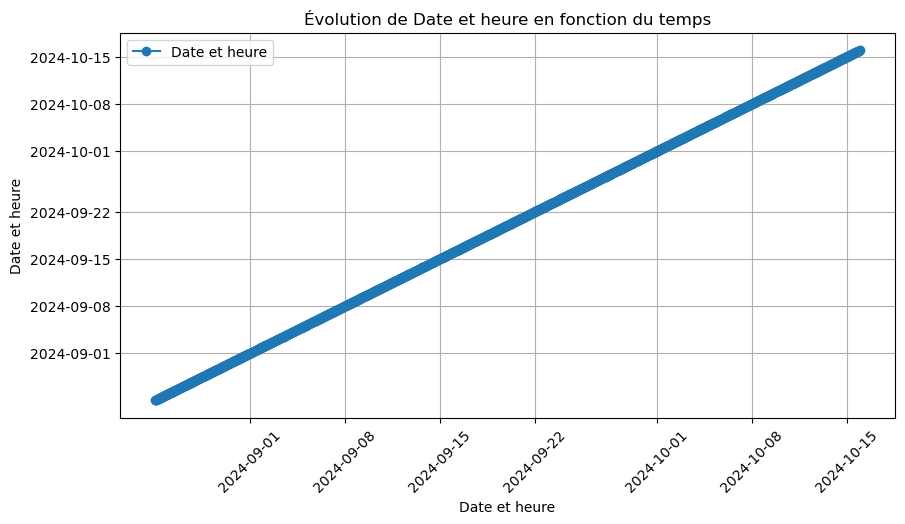

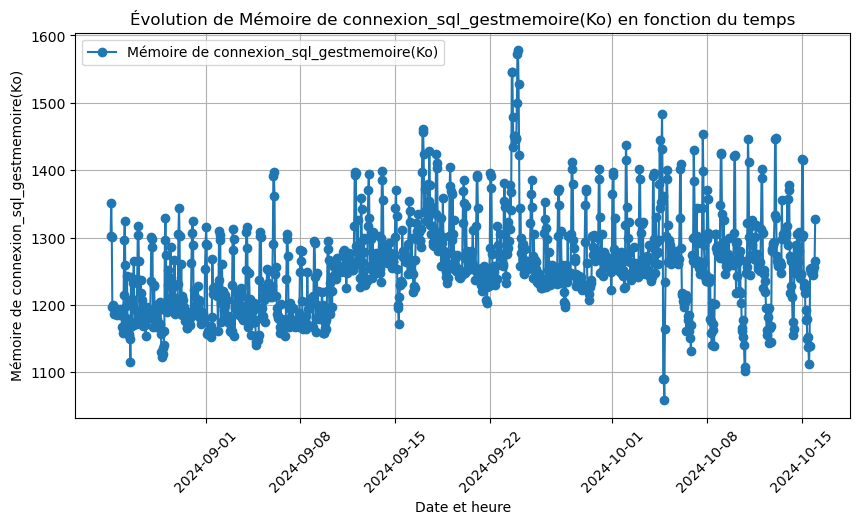

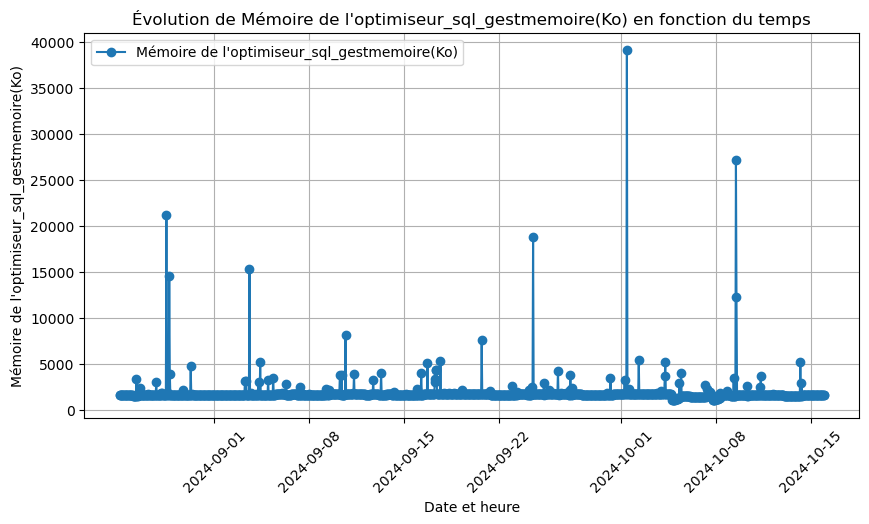

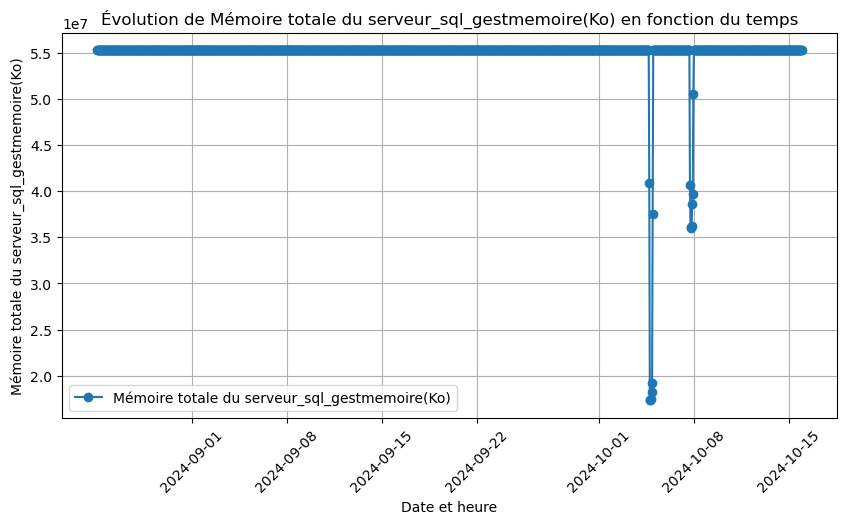

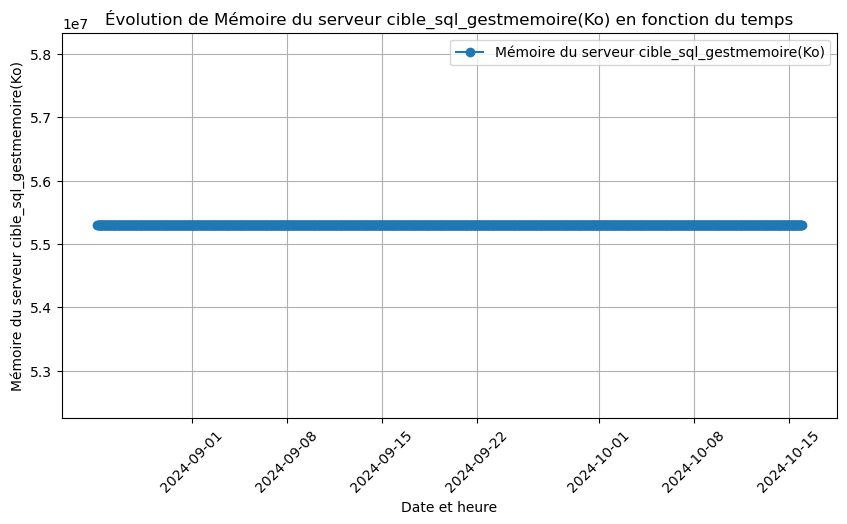

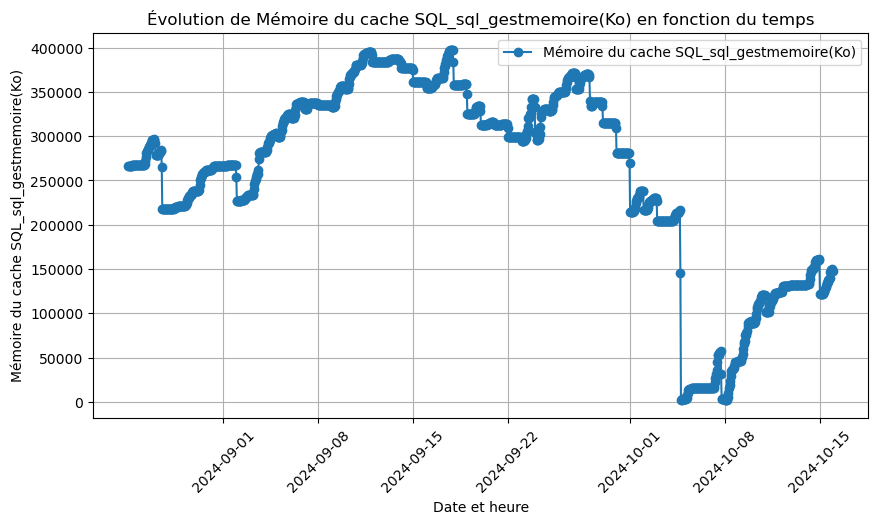

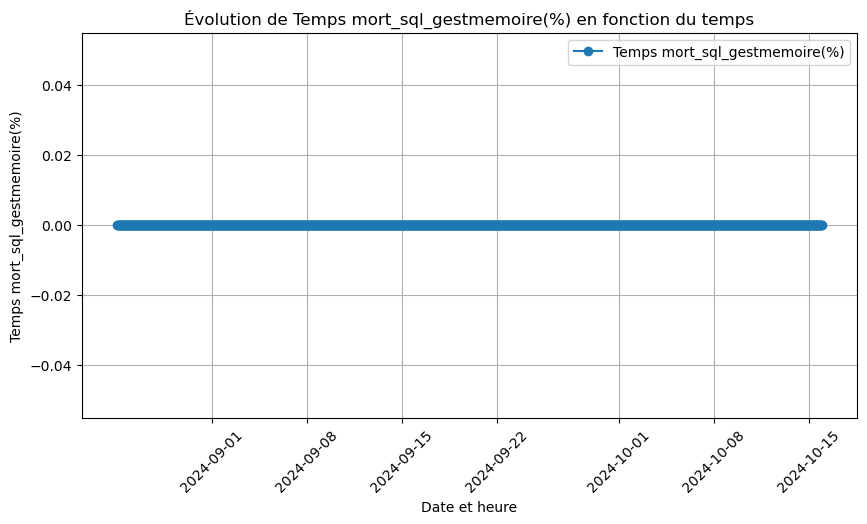

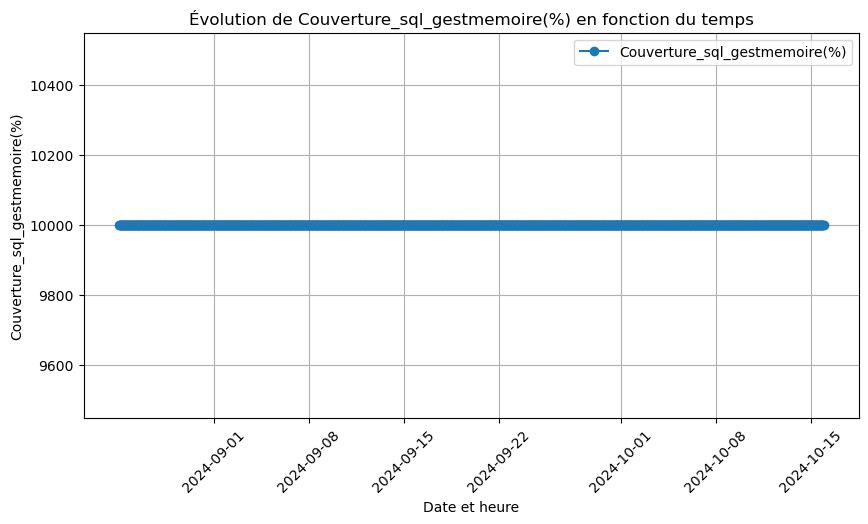

In [268]:
import matplotlib.pyplot as plt
import itertools
import pandas as pd

import matplotlib.pyplot as plt

# Vérifier que 'date_full' est bien au format datetime
tab["Date et heure"] = pd.to_datetime(tab["Date et heure"])

# Liste des colonnes à exclure
excluded_cols = ["date_full", "date", "heure", "Date et heure(RAW)"]

# Tracer chaque colonne en fonction du temps
for col in tab.columns:
    if col not in excluded_cols:  # Exclure les colonnes non pertinentes
        plt.figure(figsize=(10, 5))

        plt.plot(tab["Date et heure"], tab[col], marker='o', linestyle='-')

        plt.xlabel("Date et heure")
        plt.ylabel(f"{col}")  # Correction de la syntaxe
        plt.title(f"Évolution de {col} en fonction du temps")
        plt.legend([col])  # Correction de la légende
        plt.xticks(rotation=45)
        plt.grid()

        plt.show()

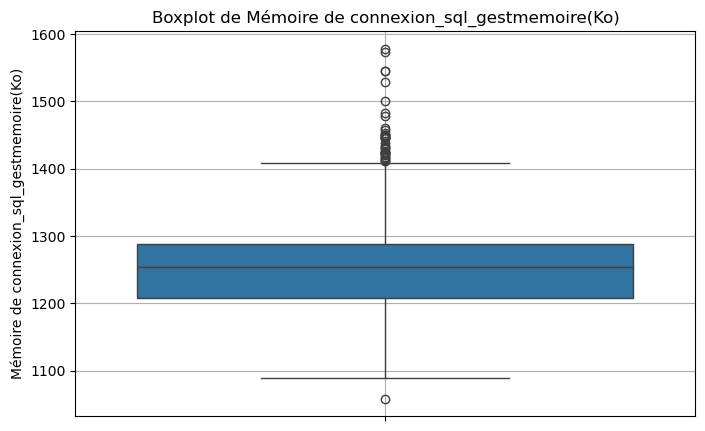

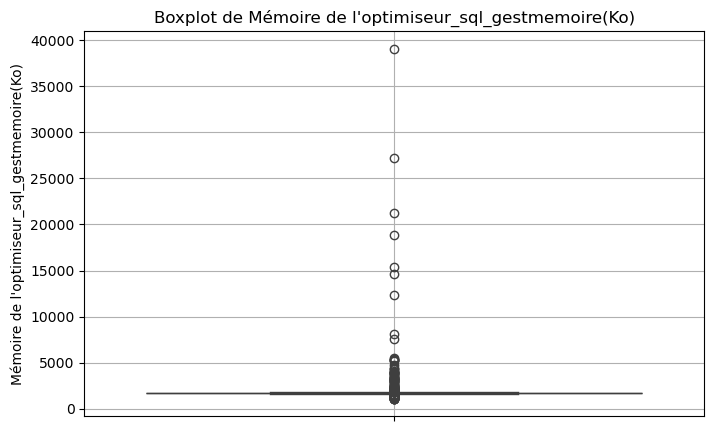

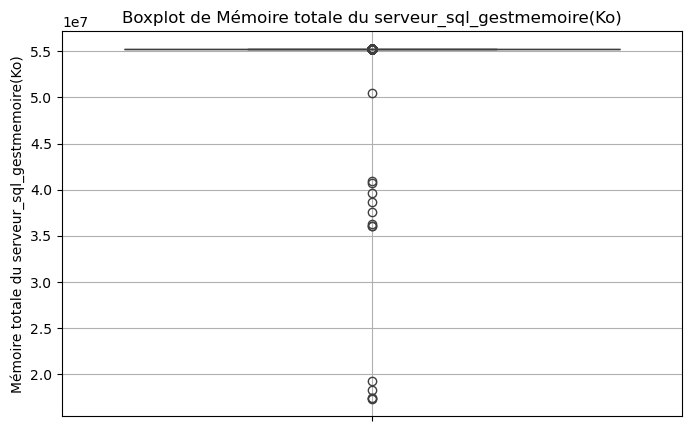

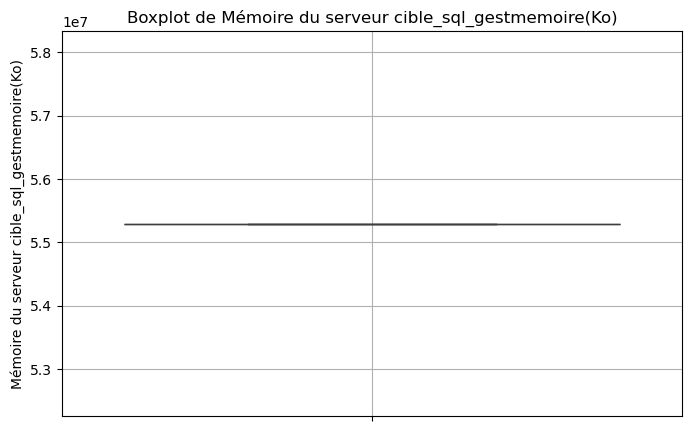

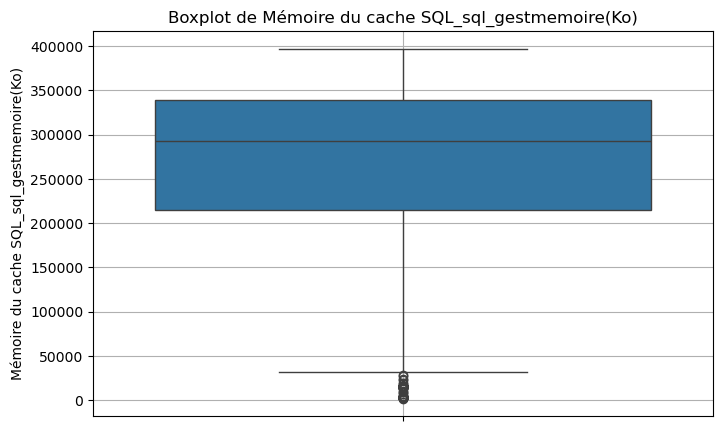

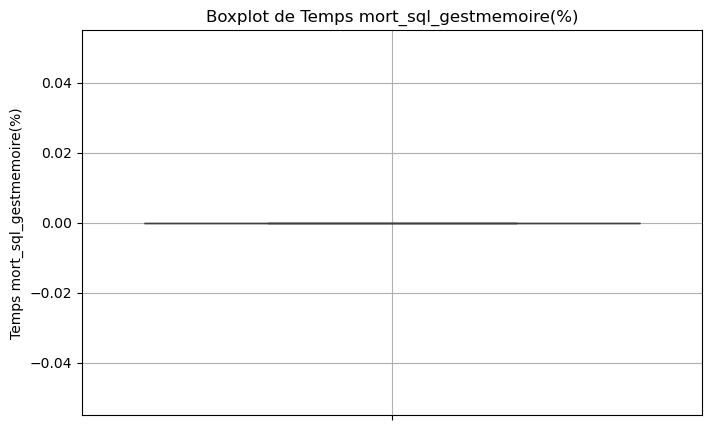

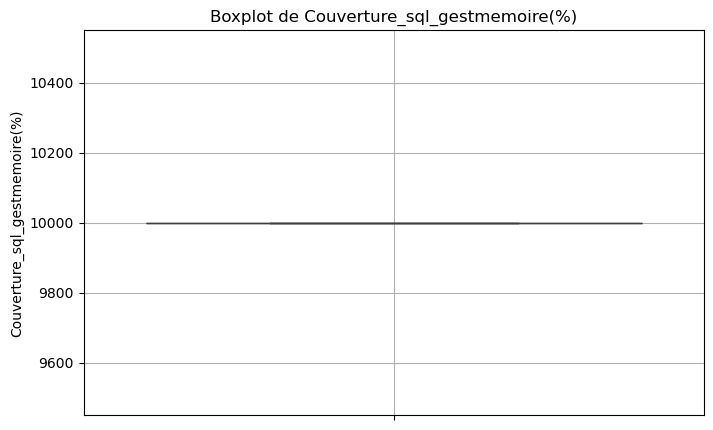

In [269]:
import seaborn as sns

# Exclure les colonnes non numériques
numerical_cols = tab.select_dtypes(include=['number']).columns

# Tracer un boxplot pour chaque colonne
for col in numerical_cols:
    if col not in excluded_cols:  # Exclure les colonnes non pertinentes
        plt.figure(figsize=(8, 5))
        sns.boxplot(y=tab[col])
        plt.title(f"Boxplot de {col}")
        plt.grid()
        plt.show()

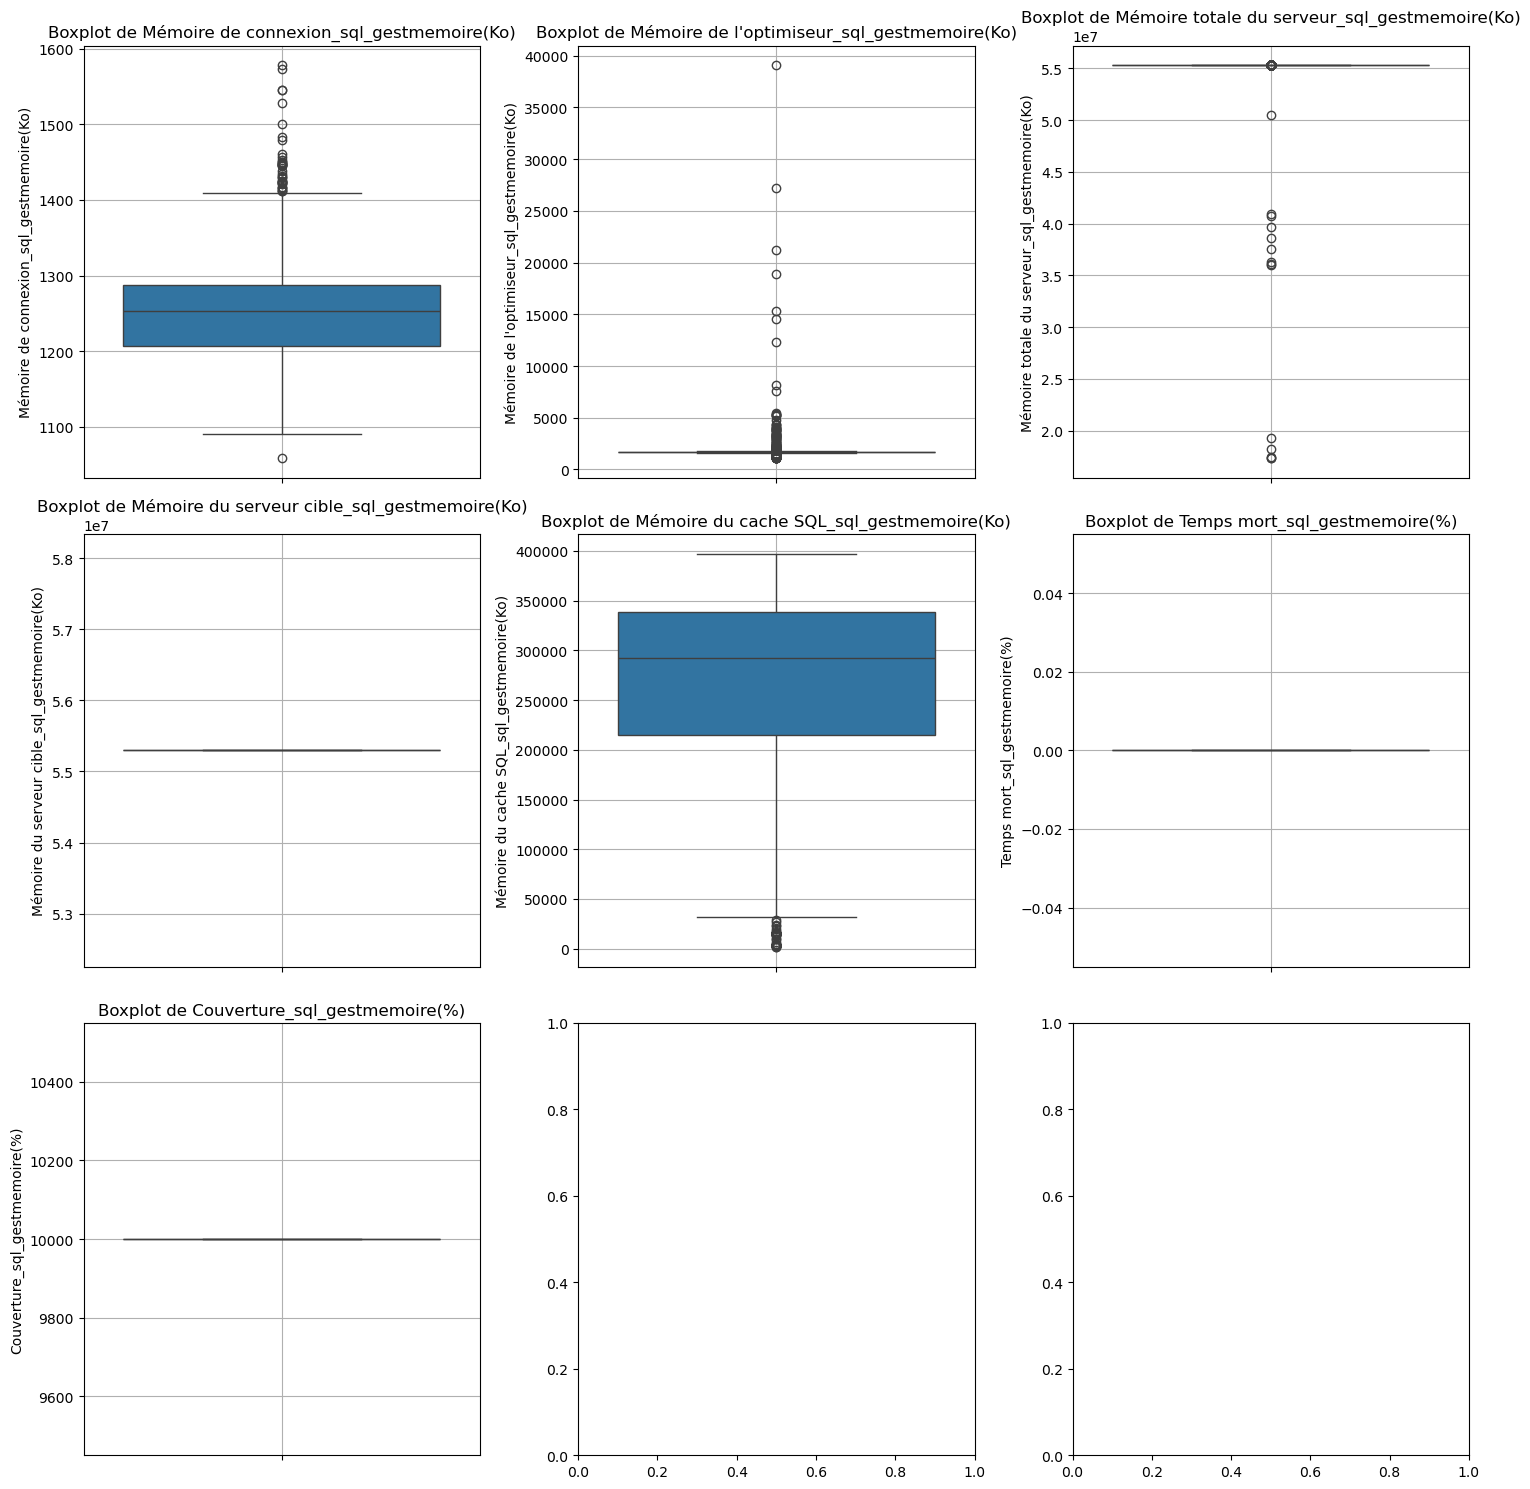

In [270]:
# Sélection des colonnes numériques
numerical_cols = tab.select_dtypes(include=['number']).columns

# Filtre pour exclure les colonnes non pertinentes
cols_to_plot = [col for col in numerical_cols if col not in excluded_cols]

rows=(math.ceil(len(cols_to_plot)/3))
# Créer une figure avec 2 lignes et 3 colonnes de sous-graphiques (axes)
fig, axes = plt.subplots(nrows=rows, ncols=3, figsize=(15, rows*5))

# Convertir "axes" en un tableau 1D pour plus de flexibilité
axes = axes.flatten()

# Boucler sur les colonnes et tracer un boxplot dans chaque sous-graphique
for i, col in enumerate(cols_to_plot):
    sns.boxplot(y=tab[col], ax=axes[i])
    axes[i].set_title(f"Boxplot de {col}")
    axes[i].grid()

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher la figure
plt.show()

### drop des colonnes inutiles

In [272]:
tab = tab.drop(columns=["Temps mort_sql_gestmemoire(%)"])
tab = tab.drop(columns=["Couverture_sql_gestmemoire(%)"])
tab = tab.drop(columns=["Mémoire du serveur cible_sql_gestmemoire(Ko)"])

### Enregistrement du nouveau dataframe dans un nouveau csv

In [274]:
#### ATTENTION au path et nom de fichier
tab.to_csv("../data/logServer/filtered/myreport_sql_gestionairedememoire_filtered.csv", index=False, encoding='utf-8')